In [137]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier

from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer,OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import mlrose
from sklearn.metrics import accuracy_score
bc = load_breast_cancer()
data=bc.data
target=bc.target
import time


# Initialize neural network object and fit object
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, \
                                                    test_size = 0.2, random_state = 3)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()
t0 = time.clock()
test_accut=[]
for i in range(10):
    nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                     algorithm = 'gradient_descent', max_iters = 2000, \
                                     bias = True, is_classifier = True, learning_rate = 0.3, \
                                     early_stopping = True, clip_max = 5, max_attempts = 1600)
#     nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
#                                          algorithm = 'genetic_alg', max_iters = 1, \
#                                          bias = True, is_classifier = True, learning_rate = .1, \
#                                           mutation_prob = .3, pop_size = 800, early_stopping = True, clip_max = 5, max_attempts = 100)
    nn_model2.fit(X_train_scaled, y_train_hot)
    # Predict labels for train set and assess accuracy
    #         y_train_pred = nn_model2.predict(X_train_scaled)
    #         y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
    #         #print(y_train_accuracy)
    #         train_accuracy_list.append([counter, 1-y_train_accuracy])

    # Predict labels for test set and assess accuracy
    y_test_pred = nn_model2.predict(X_test_scaled)
    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
    test_accut.append(y_test_accuracy)
print(max(test_accut))
print(time.clock()-t0)

C:\Users\rosha\Anaconda2\envs\py3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


0.8596491228070176
30.300399678201217


In [134]:
from statistics import mean 
print(mean(test_accut))
print(12.853505987462185/10.0)

0.8219298245614035
1.2853505987462186


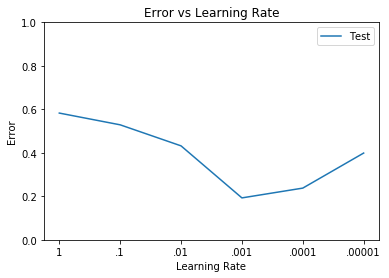

In [50]:
NUM_TIMS_TO_RUN = 100
MAX_ITTERS = 3000
LEARNING_RATE = [1,.1,.01,.001,.0001,.00001]
LEARNING_RATE1 = ['1','.1','.01','.001','.0001','.00001']

sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    counter=0
    for i in LEARNING_RATE:
        #print(i)
        nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                         algorithm = 'gradient_descent', max_iters = 2000, \
                                         bias = True, is_classifier = True, learning_rate = i, \
                                         early_stopping = True, clip_max = 5, max_attempts = 100)

        nn_model2.fit(X_train_scaled, y_train_hot)
        # Predict labels for train set and assess accuracy
#         y_train_pred = nn_model2.predict(X_train_scaled)
#         y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
#         #print(y_train_accuracy)
#         train_accuracy_list.append([counter, 1-y_train_accuracy])

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model2.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        test_accuracy_list.append([counter, 1-y_test_accuracy])
        counter=counter+1

    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    #sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
#avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print(avg_test_prediction)


plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.ylim((0,1))
my_xticks = LEARNING_RATE1
plt.xticks(avg_test_prediction[:,0],my_xticks)
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
#plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Error vs Learning Rate')
plt.legend()
plt.show()


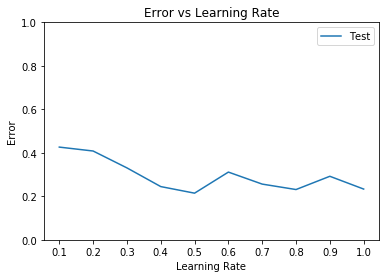

In [72]:
NUM_TIMS_TO_RUN = 20
MAX_ITTERS = 3000
# LEARNING_RATE = [1,.1,.01,.001,.0001,.00001]
LEARNING_RATE = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
LEARNING_RATE1 = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']

sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    counter=0
    for i in LEARNING_RATE:
        #print(i)
        nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                         algorithm = 'random_hill_climb', max_iters = 200, \
                                         bias = True, is_classifier = True, learning_rate = i, \
                                         early_stopping = True, clip_max = 5, max_attempts = 100)

        nn_model2.fit(X_train_scaled, y_train_hot)
        # Predict labels for train set and assess accuracy
#         y_train_pred = nn_model2.predict(X_train_scaled)
#         y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
#         #print(y_train_accuracy)
#         train_accuracy_list.append([counter, 1-y_train_accuracy])

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model2.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        test_accuracy_list.append([counter, 1-y_test_accuracy])
        counter=counter+1

    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    #sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
#avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print(avg_test_prediction)


plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.ylim((0,1))
my_xticks = LEARNING_RATE1
plt.xticks(avg_test_prediction[:,0],my_xticks)
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
#plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Error vs Learning Rate')
plt.legend()
plt.show()


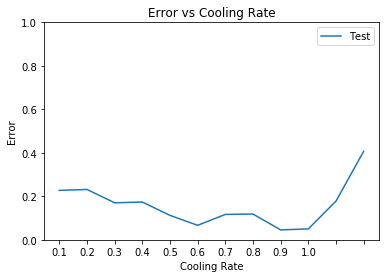

In [115]:
NUM_TIMS_TO_RUN = 10
MAX_ITTERS = 3000
LEARNING_RATE = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,5,10]
LEARNING_RATE1 = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']

sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    counter=0
    for i in LEARNING_RATE:
        #print(i)
        nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                         algorithm = 'simulated_annealing', max_iters = 2000, \
                                         bias = True, is_classifier = True, learning_rate = i, \
                                         early_stopping = True, clip_max = 5, max_attempts = 100)

        nn_model2.fit(X_train_scaled, y_train_hot)
        # Predict labels for train set and assess accuracy
#         y_train_pred = nn_model2.predict(X_train_scaled)
#         y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
#         #print(y_train_accuracy)
#         train_accuracy_list.append([counter, 1-y_train_accuracy])

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model2.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        test_accuracy_list.append([counter, 1-y_test_accuracy])
        counter=counter+1

    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    #sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
#avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print(avg_test_prediction)


plt.xlabel('Cooling Rate')
plt.ylabel('Error')
plt.ylim((0,1))
my_xticks = LEARNING_RATE1
plt.xticks(avg_test_prediction[:,0],my_xticks)
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
#plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Error vs Cooling Rate')
plt.legend()
plt.show()


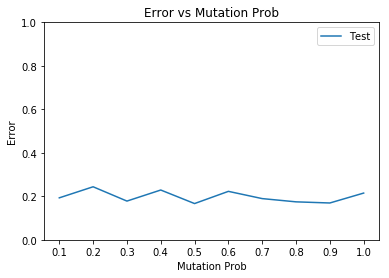

In [122]:
NUM_TIMS_TO_RUN = 10
MAX_ITTERS = 3000
LEARNING_RATE = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
LEARNING_RATE1 = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']

sum_test_accuracy_list=np.array([0,0])
sum_train_accuracy_list=np.array([0,0])

for j in range(NUM_TIMS_TO_RUN):
    test_accuracy_list=[]
    train_accuracy_list = []
    counter=0
    for i in LEARNING_RATE:
        #print(i)
        
        nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [2], activation = 'relu', \
                                         algorithm = 'genetic_alg', max_iters = 1, \
                                         bias = True, is_classifier = True, learning_rate = .1, \
                                          mutation_prob = i, pop_size = 800, early_stopping = True, clip_max = 5, max_attempts = 100)

        nn_model2.fit(X_train_scaled, y_train_hot)
        # Predict labels for train set and assess accuracy
#         y_train_pred = nn_model2.predict(X_train_scaled)
#         y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)
#         #print(y_train_accuracy)
#         train_accuracy_list.append([counter, 1-y_train_accuracy])

        # Predict labels for test set and assess accuracy
        y_test_pred = nn_model2.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
        test_accuracy_list.append([counter, 1-y_test_accuracy])
        counter=counter+1

    sum_test_accuracy_list = sum_test_accuracy_list + np.array(test_accuracy_list)
    #sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)

avg_test_prediction= sum_test_accuracy_list/NUM_TIMS_TO_RUN
#avg_train_prediction =sum_train_accuracy_list/NUM_TIMS_TO_RUN
#print(avg_test_prediction)


plt.xlabel('Mutation Prob')
plt.ylabel('Error')
plt.ylim((0,1))
my_xticks = LEARNING_RATE1
plt.xticks(avg_test_prediction[:,0],my_xticks)
plt.plot(avg_test_prediction[:,0],avg_test_prediction[:,1], label='Test')
#plt.plot(avg_train_prediction[:,0],avg_train_prediction[:,1], label='Train')
plt.title('Error vs Mutation Prob')
plt.legend()
plt.show()
